In [1]:
import pandas as pd

from sklearn import linear_model
from sklearn.model_selection import train_test_split

# Prepare data and model

In [2]:
df = pd.read_csv("Data_for_Question_3.csv", index_col=0)
df = df.dropna(axis=1)
df["Price sold"] = df["Price sold"].str.replace("$", "", regex=False).str.replace(",", "").astype(float)

X = df.drop("Price sold", axis=1)
y = df["Price sold"]

# split to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [3]:
reg = linear_model.LinearRegression()

# fit model
reg.fit(X_train, y_train)

# get score
reg.score(X_test, y_test)

0.8548095029120559

# Results

In [9]:
df["Predictions"] = reg.predict(X)
df["Diff"] = df["Predictions"] - df["Price sold"]

In [23]:
df.sort_values(by="Diff").astype(int)

,Square Meters,Floor,Years since renovation,Price sold,Predictions,Diff
ID,,,,,,
630,166,43,5,4117732,2543910,-1573821
502,169,52,7,3721057,2641946,-1079110
39,162,1,10,1982469,932519,-1049949
5,121,40,8,2796532,1899454,-897077
714,158,35,8,2867892,2013203,-854688
...,...,...,...,...,...,...
564,203,29,11,1570149,1898039,327890
504,181,35,9,1753536,2084356,330820
340,200,32,9,1793512,2130845,337333


In [33]:
# get the rank of apartment 38 in the cheapest apartments
len(df["Price sold"].sort_values().loc[:38])

59

<AxesSubplot:>

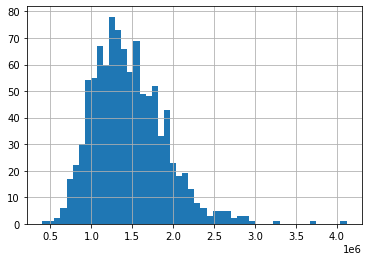

In [21]:
df["Price sold"].hist(bins=50)

<AxesSubplot:xlabel='ID'>

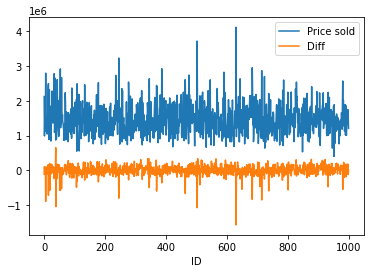

In [16]:
df[["Price sold", "Diff"]].plot()